In [1]:
!pip install fliscopt==0.1.5

     |████████████████████████████████| 211 kB 6.9 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 


In [3]:
import matplotlib
matplotlib.use('TKAgg')

Let's first implement our Cost/Objective function.

In this case we chose ReLU and Leaky ReLU as examples of cost functions.

NOTE: You need to follow this format, 

```
def fn(x): 
  return x[0]*40+x[2]
```
similar to Scipy format. Using this format any arbitrary function or problem can be defined


In [4]:
def fn(x):
  return x[0]*2+max(x[1],0)-21+x[2]**3

In [5]:
fn([1,2,3])

10

#NOTE: You might need to download and read flights.txt since that is the default problem before doing any steps [Download](https://drive.google.com/file/d/1-wxzUMLloeF1tGYEVHvBG_Dh6jfZ-pzR/view?usp=sharing)

 You need to create a data directory outside your current directory(content/ in Collab) and move flights.txt to that folde.This is a convention followed by fliscopt.
The uploaded file will be present in content/

Upload flights.txt

```
cd ../; mkdir data/ (this is data dir above content/)
```
then


```
mv content/flights.txt ../data/flights.txt
```




In [6]:
!cd ../;mkdir data/

In [7]:
!mv /content/flights.txt ../data/flights.txt

In [8]:
#!mkdir data; mv flights.txt data/flights.txt

In [9]:
from fliscopt.utils.util import read_file, plot_scores
from fliscopt.fitness import domain,griewank,fitness_function
from fliscopt.ga import ReverseGA,GAReversals,GA
read_file('flights.txt')

'------File Read-----'

# Simple Genetic Algorithm

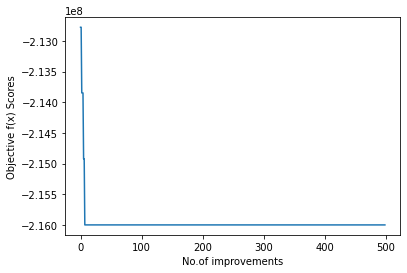

In [10]:
ga=GA(seed_init=False)
soln, cost, scores, nfe, seed=ga.run(domain=domain['griewank']*3,fitness_function=fn,seed=5)
plot_scores(scores,ga.get_name(),fname='relu',save_fig=False)

In [11]:
print(cost)

-216001221


# Genetic Algorithm with Reverse Operations

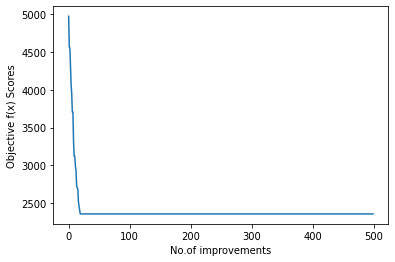

In [12]:
rga=ReverseGA(seed_init=False)
soln, cost, scores, nfe, seed=rga.run(domain=domain['domain'],fitness_function=fitness_function,seed=5)
plot_scores(scores,rga.get_name(),fname='relu',save_fig=False)

In [13]:
print(cost)

2356


# Genetic Algorithm with Reversals(reverse steps)

**n_k **parameter in conjucton with **number_generations** is used to calcuate number of reversals.

So, for **500** generations and **125** n_k we should get:
 
500/125 -1(first iteration)=3 reversal steps

1


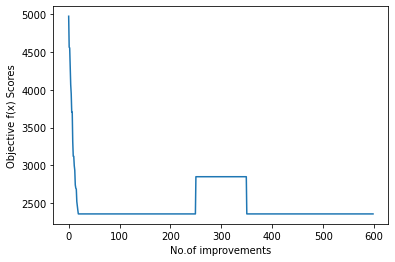

In [14]:
rga=GAReversals(seed_init=False,n_k=125)
soln, cost, scores, nfe, seed=rga.run(domain=domain['domain'],fitness_function=fitness_function,seed=5)
plot_scores(scores,rga.get_name(),fname='relu',save_fig=False)

In [15]:
print(cost)

2356


It is clear by looking at the objective plot how it reverses for a certain **step_length** which is a controllable parameter as to how many iterations does it reverse(performs maxmization) before returning back to it's original minimization process.

# What is the domain?
In our case the domain consists of a dictionary with various values for each benchmark function.
Those having a single [(x,x)] are n-dimensional,
and can be used for d*5.

Each tuple indicates the domain of x,y,z variable.
We demonstrate how to use a domain of x,y,z below

In [16]:
domain

{'ackley_N2': [(-32, 32), (-32, 32)],
 'booth': [(-10, 10), (-10, 10)],
 'brown': [(-1, 4)],
 'domain': [(0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9),
  (0, 9)],
 'griewank': [(-600, 600)],
 'matyas': [(-10, 10), (-10, 10)],
 'rosenbrock': [(-5, 10)],
 'schaffer_N1': [(-100, 100), (-100, 100)],
 'schwefel_N2_23': [(-10, 10)],
 'sphere': [(-5, 5)],
 'three_hump_camel': [(-5, 5), (-5, 5)],
 'zakharov': [(-5, 10)]}

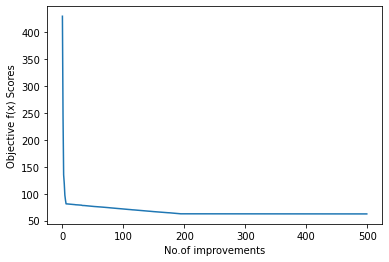

[-132, -44, -250, -132, 224, 8, 215, -27, 94, -207]
62.35411766739374


In [17]:
rga=GA(seed_init=False)
soln, cost, scores, nfe, seed=rga.run(domain=[(-1000,1000)]*10,
                                      fitness_function=griewank,seed=5)
plot_scores(scores,rga.get_name(),fname='relu',save_fig=False)
print(soln)
print(cost)

# Iterated Chaining

**rounds** indicates number of iterations, n_obs and tol are variables which somewhat control the Early Stopping mechanism implemented.

Really experimental method, not really recommended, it uses GA operators combined with solution chaining.

**algo1=soln1--->algo2=soln2-->algo1=soln1....continue** 
till rounds

OR

stop if Early Stopping Conditions are met

Cost at 0==4175

1


Cost at 0==2404

Cost at 1==4392

1


Cost at 1==2404

Cost at 2==3897

1


Cost at 2==2404

Cost at 3==4638

1


Cost at 3==2356

Cost at 4==4624

1


Cost at 4==2875

Cost at 5==5112

1


Cost at 5==2404

Cost at 6==4747

1


Cost at 6==2404

Cost at 7==4466

1


Cost at 7==2404

Cost at 8==4518

1


Cost at 8==2356

1


Cost at 9==2356

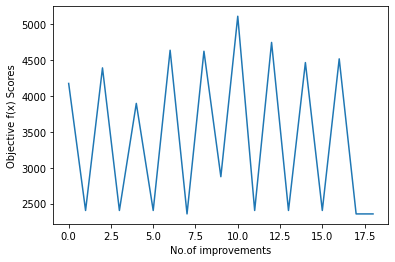

In [18]:
from fliscopt.chaining import IteratedChaining
from fliscopt.rs import RandomSearch
from fliscopt.hc import HillClimb
ic=IteratedChaining(rounds=10, n_obs=2, tol=90,domain=domain['domain'],fitness_function=fitness_function,seed=5)
soln, cost, scores, nfe=ic.run('RandomSearch', 'GAReversals')
plot_scores(scores,"Chaining",fname='relu',save_fig=False)

In [19]:
print(cost)

2356


If you notice closely this method can actually give good results(but has really high variance of resutls), since only the initial seed is set not of the local runs(RS and the GA ) which makes it stochastic in nature. Setting the seed of the local runs would result in basically same result and no change would be obtained on running for more than 1 iteration :/

# Multiprocessing!

Bored ? Then use multiproc!
In this example we use multiproc on LeakyRelu function

**NOTE: Version 0.1.2 doesn't support multiproc for Iterated Chaning and may not be working to support it for IC in the future.(we'll see).**

In [23]:
from fliscopt.multiproc import multiple_runs
multiple_runs(RandomSearch, domain['domain'], fitness_function, record=False, n=10)

Total time: 0.42046356201171875


Run_Number      Solution              Cost  NFE SEED

0 [4, 5, 3, 1, 2, 3, 0, 2, 4, 1, 4, 5] 4429 100 10
1 [3, 7, 3, 9, 3, 7, 5, 7, 1, 6, 1, 8] 4329 100 24
2 [7, 7, 5, 6, 4, 3, 6, 3, 6, 2, 0, 4] 4715 100 32
3 [5, 5, 9, 2, 9, 2, 9, 3, 9, 4, 5, 1] 4844 100 100
4 [4, 7, 2, 7, 1, 6, 5, 7, 3, 5, 2, 7] 4013 100 20
5 [1, 9, 1, 4, 1, 3, 0, 1, 0, 4, 0, 2] 4632 100 67
6 [4, 4, 2, 3, 2, 3, 2, 2, 1, 8, 3, 4] 4509 100 13
7 [0, 8, 1, 8, 3, 6, 5, 8, 4, 9, 2, 9] 4870 100 19
8 [7, 2, 3, 2, 6, 2, 3, 1, 3, 4, 4, 3] 4604 100 65
9 [3, 4, 3, 9, 2, 7, 4, 3, 0, 2, 2, 2] 4624 100 51


In [21]:
multiple_runs(ReverseGA, domain['domain'], fitness_function=fn, record=True, n=10)

Total time: 2.4437172412872314


Results and plots can easily be saved in respective plots/ and results/ folders.

In [22]:
!cat /content/results/multi_proc/fn/ReverseGA_results.csv

MRun_no,Cost,Run_Time,Solution,Nfe,Seed
0,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,10
1,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,24
2,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,32
3,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,100
4,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,20
5,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,67
6,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,13
7,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,19
8,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,65
9,-21,0.24437172412872316,[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],1000,51
